In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [112]:
filename= "/home/renzo/Documents/RLE/Codigos/rle_127/solo12-pybullet/telemetria/fuerzas_Bezier10.csv"
data = pd.read_csv(filename)
data[["FR"]] = data[["FR"]].abs()
data[["FL"]] = data[["FL"]].abs()
data[["BR"]] = data[["BR"]].abs()
data[["BL"]] = data[["BL"]].abs()
data.head(5)

,t,FR,FL,BR,BL,n_FR,n_FL,n_BR,n_BL,t_FL_HAA,...,z_FR,x_FL,y_FL,z_FL,x_HR,y_HR,z_HR,x_HL,y_HL,z_HL
0,0.022960,0.244861,0.232701,0.245056,0.232511,15.603804,15.306208,3.041819,0.245056,-3.000000,...,0.019103,0.194600,0.168910,0.019103,-0.194600,-0.168910,0.019103,-0.194600,0.168910,0.019103
1,0.028693,0.000000,0.000000,0.000000,0.000000,4.832697,4.210142,2.370450,0.000000,-2.290615,...,0.007921,0.193642,0.164257,0.007921,-0.193642,-0.164257,0.007921,-0.193642,0.164257,0.007921
2,0.040990,0.023920,0.016456,0.022969,0.017414,1.460676,0.023920,10.777476,10.648101,-1.465606,...,-0.001087,0.192891,0.160645,-0.001087,-0.192891,-0.160645,-0.001087,-0.192891,0.160645,-0.001087
3,0.047954,0.000000,0.000000,0.000000,0.000000,0.915586,0.000000,1.669403,1.340267,-0.898129,...,-0.008341,0.192300,0.157821,-0.008345,-0.192300,-0.157821,-0.008345,-0.192300,0.157821,-0.008341
4,0.060612,0.163479,0.159273,0.162145,0.160604,0.491020,0.163479,5.423607,5.422708,-0.498933,...,-0.014181,0.191832,0.155598,-0.014199,-0.191832,-0.155598,-0.014199,-0.191832,0.155599,-0.014181


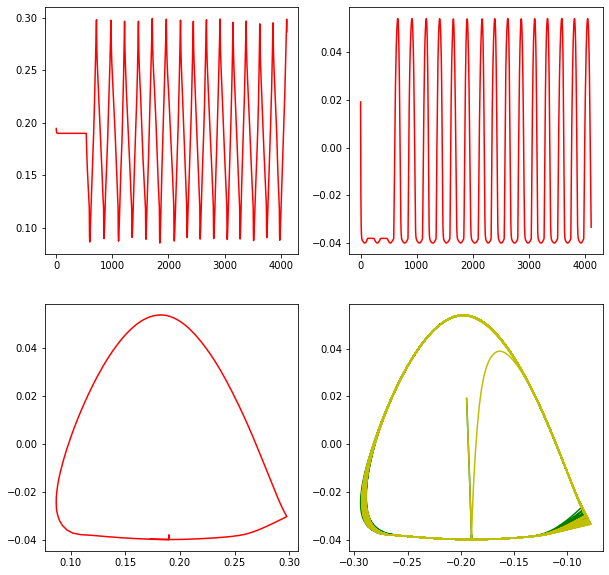

In [113]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

a = 800
axs[0,0].plot(data[["x_FL"]],'r')
#axs[0,0].plot(data[["t"]], data[["x_FL"]],'b')
#axs[0,0].plot(data[["t"]], data[["x_HR"]],'g')
#axs[0,0].plot(data[["t"]], data[["x_HL"]],'y')

axs[0,1].plot(data[["z_FL"]],'r')
#axs[0,1].plot(data[["t"]], data[["z_FL"]],'b')
#axs[0,1].plot(data[["t"]], data[["z_HR"]],'g')
#axs[0,1].plot(data[["t"]], data[["z_HL"]],'y')

axs[1,0].plot(data[["x_FL"]][100:a], data[["z_FL"]][100:a],'r')
#axs[1,0].plot(data[["x_FL"]][0:500], data[["z_FL"]][0:500],'b')
axs[1,1].plot(data[["x_HR"]], data[["z_HR"]],'g')
axs[1,1].plot(data[["x_HL"]], data[["z_HL"]],'y')


plt.show()

In [114]:
def plot_data(data, axs, ix, iy, colx, coly, xlab, ylab, tit):
    axs[ix,iy].plot(data[[colx]], data[[coly]])
    axs[ix,iy].set_xlabel(xlab)
    axs[ix,iy].set_ylabel(ylab)
    axs[ix,iy].set_title(tit)

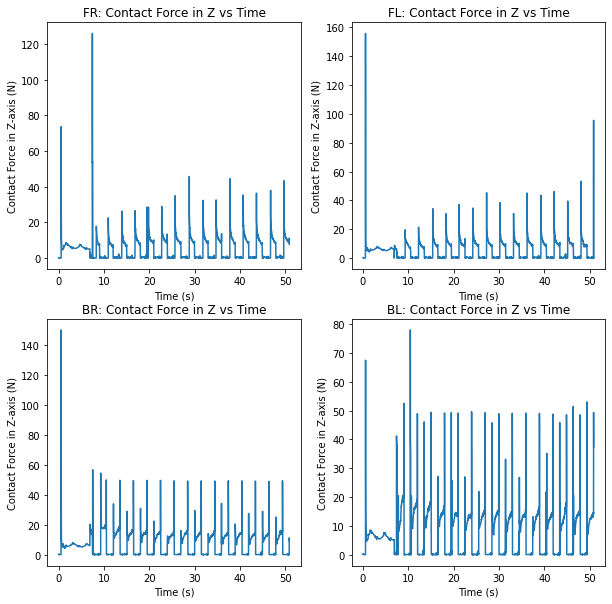

In [115]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
# Fuerza en FR
plot_data(data, axs, 0, 0, "t", "FR", "Time (s)", "Contact Force in Z-axis (N)", "FR: Contact Force in Z vs Time")
# Fuerza en FL
plot_data(data, axs, 0, 1, "t", "FL", "Time (s)", "Contact Force in Z-axis (N)", "FL: Contact Force in Z vs Time")
# Fuerza en BR
plot_data(data, axs, 1, 0, "t", "BR", "Time (s)", "Contact Force in Z-axis (N)", "BR: Contact Force in Z vs Time")
# Fuerza en BL
plot_data(data, axs, 1, 1, "t", "BL", "Time (s)", "Contact Force in Z-axis (N)", "BL: Contact Force in Z vs Time")

plt.show()

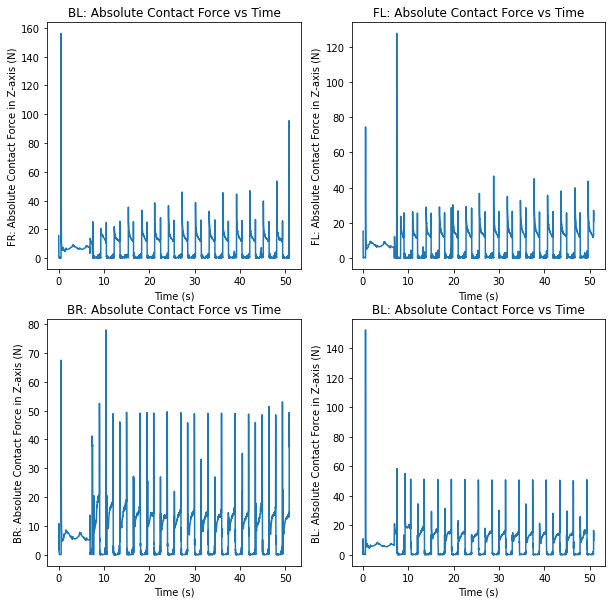

In [116]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
# Fuerza en FR
plot_data(data, axs, 0, 0, "t", "n_FR", "Time (s)", "FR: Absolute Contact Force in Z-axis (N)", "BL: Absolute Contact Force vs Time")
# Fuerza en FL
plot_data(data, axs, 0, 1, "t", "n_FL", "Time (s)", "FL: Absolute Contact Force in Z-axis (N)", "FL: Absolute Contact Force vs Time")
# Fuerza en BR
plot_data(data, axs, 1, 0, "t", "n_BR", "Time (s)", "BR: Absolute Contact Force in Z-axis (N)", "BR: Absolute Contact Force vs Time")
# Fuerza en BL
plot_data(data, axs, 1, 1, "t", "n_BL", "Time (s)", "BL: Absolute Contact Force in Z-axis (N)", "BL: Absolute Contact Force vs Time")

plt.show()

In [117]:
def estadisticas_fuerza(data,col):
    stats = []
    stats.append(data[[col]][500::].mean()[0])
    stats.append(data[[col]][500::].max()[0])
    stats.append(data[[col]][500::].min()[0])
    print("media",col,":",stats[0])
    print("max:",col,":",stats[1])
    print("min:",col,":",stats[2])
    return stats


In [118]:
stats_FR = estadisticas_fuerza(data,"FR")
stats_FL = estadisticas_fuerza(data,"FL")
stats_BR = estadisticas_fuerza(data,"BR")
stats_BL = estadisticas_fuerza(data,"BL")


media FR : 4.698079050414044
max: FR : 125.90409746996815
min: FR : 0.0
media FL : 4.662187314019535
max: FL : 95.55711750404863
min: FL : 0.0
media BR : 6.691196400490522
max: BR : 56.67318657205859
min: BR : 0.0
media BL : 7.006474222582874
max: BL : 78.0629721506575
min: BL : 0.0


In [119]:
data[["FR"]].min()[0]

0.0